# Install and import dependencies.

Make sure the python version is higher than 3.8 and lower than 3.12.

In [ ]:
!python3 --version

Python 3.11.13


Install pandasai 3.0.0b2 or newer.

In [ ]:
!pip install "pandasai>=3.0.0b2"

Intall pandasai liteLLM.

In [ ]:
!pip install pandasai-litellm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 946.9/946.9 kB 71.6 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.95.1
    Uninstalling openai-1.95.1:
      Successfully uninstalled openai-1.95.1


Import dependencies.

In [ ]:
import os
import io
import re
import time
import json
import random
import pandas as pd
import pandasai as pai
from getpass import getpass
from litellm import completion
from google.colab import files
from pandasai import SmartDataframe, SmartDatalake
from pandasai_litellm.litellm import LiteLLM
from pandasai.core.response.dataframe import DataFrameResponse

# Create new domain.

Input domain name.

In [ ]:
domain = input("Enter new domain name: ")

Enter new domain name: Campaign


Upload files.

In [ ]:
uploaded = files.upload(f"/domain/{domain}")

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving area_m0.csv to /domain/Campaign/area_m0.csv
Saving area_m1.csv to /domain/Campaign/area_m1.csv
Saving arpu.csv to /domain/Campaign/arpu.csv
Saving branch.csv to /domain/Campaign/branch.csv
Saving channel_m0.csv to /domain/Campaign/channel_m0.csv
Saving channel_m1.csv to /domain/Campaign/channel_m1.csv
Saving cumulative.csv to /domain/Campaign/cumulative.csv
Saving daily.csv to /domain/Campaign/daily.csv
Saving period.csv to /domain/Campaign/period.csv
Saving periode_date.csv to /domain/Campaign/periode_date.csv
Saving product.csv to /domain/Campaign/product.csv
Saving product_dsc.csv to /domain/Campaign/product_dsc.csv
Saving region_m0.csv to /domain/Campaign/region_m0.csv
Saving region_m1.csv to /domain/Campaign/region_m1.csv
Saving trend_target_addon.csv to /domain/Campaign/trend_target_addon.csv
User uploaded file "/domain/Campaign/area_m0.csv" with length 219 bytes
User uploaded file "/domain/Campaign/area_m1.csv" with length 210 bytes
User uploaded file "/domain/Campaign/ar

Get list of the uploaded files.

In [ ]:
def list_files_in_directory(directory_path):
    """
    Lists all files within a specified directory.

    Args:
        directory_path (str): The path to the directory.

    Returns:
        list: A list of file names found in the directory.
    """
    files_in_directory = []
    try:
        all_entries = os.listdir(directory_path)

        for entry in all_entries:
            full_path = os.path.join(directory_path, entry)
            if os.path.isfile(full_path):
                files_in_directory.append(entry)
    except FileNotFoundError:
        print(f"Error: Directory not found at '{directory_path}'")
    except Exception as e:
        print(f"An error occurred: {e}")
    return files_in_directory

directory_to_check = f'/domain/{domain}'

files = list_files_in_directory(directory_to_check)

if files:
    print(f"Files in '{directory_to_check}':")
    for file_name in files:
        print(file_name)
else:
    print(f"No files found in '{directory_to_check}' or an error occurred.")

Files in '/domain/Campaign':
channel_m0.csv
cumulative.csv
product.csv
arpu.csv
product_dsc.csv
trend_target_addon.csv
period.csv
periode_date.csv
channel_m1.csv
daily.csv
area_m1.csv
branch.csv
area_m0.csv
region_m1.csv
region_m0.csv


Collect .info() of each dataset to be used.

In [ ]:
data_info = {}
dfs = {}
for file_name in files:
  #dfs[f"{i}"] = pai.read_csv(f"/domain/{domain}/{files[i]}")
  dfs[f"{file_name}"] = pd.read_csv(f"/domain/{domain}/{file_name}", sep='|')
  df = dfs[f"{file_name}"]
  buf = io.StringIO()
  df.info(buf=buf)
  data_info[f"{file_name}"] = buf.getvalue()
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   channel_name  10 non-null     object 
 1   taker         10 non-null     int64  
 2   trx           10 non-null     int64  
 3   rev           10 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 452.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   event_date        1 non-null      object 
 1   latest_period_wl  0 non-null      float64
 2   cum_target        1 non-null      int64  
 3   cum_deliv         1 non-null      int64  
 4   cum_taker         1 non-null      int64  
 5   cum_trx           1 non-null      int64  
 6   cum_rev           1 non-null      float64
dtypes: float64(2), int64(4), object(1)
memory usag

Collect .describe() of each dataset to be used.

In [ ]:
data_describe = {}
for file_name in files:
  df = dfs[f"{file_name}"]
  data_describe[f"{file_name}"] = df.describe(include='all')
  print(data_describe[f"{file_name}"] )

        channel_name       taker         trx           rev
count             10   10.000000   10.000000  1.000000e+01
unique            10         NaN         NaN           NaN
top     FMC - Upoint         NaN         NaN           NaN
freq               1         NaN         NaN           NaN
mean             NaN   81.000000   82.500000  5.223954e+06
std              NaN  199.941102  201.367685  1.142833e+07
min              NaN    0.000000    0.000000  0.000000e+00
25%              NaN    0.000000    0.000000  0.000000e+00
50%              NaN    0.000000    0.000000  0.000000e+00
75%              NaN   14.500000   14.500000  1.244365e+06
max              NaN  634.000000  637.000000  3.490830e+07
        event_date  latest_period_wl  cum_target  cum_deliv  cum_taker  \
count            1               0.0         1.0        1.0        1.0   
unique           1               NaN         NaN        NaN        NaN   
top     2025-09-05               NaN         NaN        NaN        NaN

# Setup agent.

Set OpenAI API key.

In [ ]:
api_key = os.getenv("OPENAI_API_KEY") or os.getenv("GEMINI_API_KEY") or getpass("Enter your OpenAI API key: ")
os.environ["OPENAI_API_KEY"] = api_key
os.environ["GEMINI_API_KEY"] = api_key

Enter your OpenAI API key: ··········


or

In [ ]:
api_key = getpass("Enter your API key: ")
os.environ["OPENAI_API_KEY"] = api_key
os.environ["GEMINI_API_KEY"] = api_key

Enter your API key: ··········


# Orchestrate LLMs.

Get user prompt.

In [ ]:
user_prompt = input("Enter your prompt: ")

Enter your prompt: What were the biggest product-level drivers of our revenue change this month vs. last month?


Translate user prompt into 3 prompts for each pandasai agents and a system content for response compiler.

In [ ]:
orchestrator_start_time = time.time()

initial_response = completion(
    model="gemini/gemini-2.5-pro",
    messages=[
        {"role": "system", "content": """
        You are the Orchestrator.

        15 instructions you need to follow as the orchestrator:
        1. Think step by step.
        2. You orchestrate 3 LLM PandasAI Agents for business data analysis.
        3. The 3 agents are: Data Manipulator, Data Visualizer, Data Analyser.
        4. You will emit a specific prompt for each of those 3 agents.
        5. Each prompt is a numbered, step-by-step instruction set.
        6. Prompts must be clear, detailed, and complete to avoid ambiguity.
        7. The number of steps may differ per agent.
        8. Example user tasks include:
           - What is my revenue this week vs last week?
           - Why did my revenue drop this week?
           - Any surprises in revenue this month?
           - Notable trends this month?
           - Correlation between revenue and bounces?
           - Is this conversion rate normal for this time of year?
        9. Reason strictly from the user-provided data.
        10. Convert a short business question into three specialist prompts.
        11. If a currency is not explicitly stated assume its in Indonesian Rupiah.
        13. All specialists operate in Python using PandasAI SmartDataframe as `sdf` (backed by pandas `df`).
        14. Return STRICT JSON with keys: manipulator_prompt, visualizer_prompt, analyzer_prompt, compiler_instruction.
        15. Each value must be a **single line** string. No extra keys, no prose, no markdown/code fences.

        4 instructions for data manipulator prompt creation:
        1. Enforce data hygiene before analysis:
           - Parse dates to pandas datetime, create explicit period columns (day/week/month).
           - Set consistent dtypes for numeric fields; strip/normalize categorical labels; standardize currency units if present.
           - Handle missing values: impute or drop **only when necessary**; keep legitimate zeros.
        2. Mind the term like m0 and m1 which means month 1 and 2 and any other similar terms used to decide if something is increasing or decreasing.
        3. Mind each of the datasets name.
        4. Produce exactly the minimal, analysis-ready dataframe(s) needed for the user question, with stable, well-named columns.
        5. End by returning only:
           result = {"type":"dataframe","value": <THE_FINAL_DATAFRAME>}

        12 instructions for data visualizer prompt creation:
        1. Produce exactly ONE interactive table or diagram using Plotly; no subplots or multiple figures.
        2. Choose the best form of visualization (table or diagram) based on the user's question and the provided data.
        3. Prevent overlaps: rotate axis ticks ≤45°, wrap long labels, ensure adequate margins, place the legend outside the plot area (horizontally), and avoid dense data labels.
        4. Apply insight-first formatting for diagrams: include a clear title and subtitle, label axes with units, use thousands separators for numbers, round to 1–2 decimal places, and configure a rich hover-over with absolute numbers and percentages where relevant.
        5. Aggregate data to a sensible granularity (e.g., day, week, or month), forward/back-fill gaps when appropriate, and cap extreme outliers for readability (and note this action in the subtitle).
        6. To ensure high contrast against a white background, instruct the agent to use a truncated monochromatic colorscale. This is achieved by skipping the lightest part (e.g., the first 25%) of a standard scale like 'Blues'.
        7. The prompt for data visualizer must provide a specific implementation detail, for example: "Create a custom colorscale by sampling the 'Blues' scale from a starting point of 0.25 (25%) to 1.0 (100%) to eliminate overly pale colors." It must also state that the resulting gradient should map to the data values (lighter shades for lower values, darker for higher).
        8. If you decide to use a chart, use either a bar chart, grouped bar chart, or line chart.
        9. If you decide to use a table, incorporate in-cell bar charts (data bars) for any column with percentage values that are part of a whole.
        10. Append a pandas timestamp to the end of the output file name to ensure the filename is unique.
        11. Save the figure to an .html path (e.g., /content/exports/charts/<slug>.html) using the command fig.write_html(path, include_plotlyjs="cdn").
        12. Return only the saved file path in the required JSON envelope (do not try to display the chart): result = {"type":"file","value": "/content/exports/charts/<slug>.html"}

        3 instructions for data analyzer prompt creation:
        1. Write like you’re speaking to a person; be concise and insight-driven.
        2. Quantify where possible (deltas, % contributions, time windows); reference the exact columns/filters used.
        3. Return only:
            result = {"type":"string","value":"<3–6 crisp bullets or 2 short paragraphs of insights>"}

        34 instructions for response compiler system content creation:
        1. Brevity: ≤180 words; bullets preferred; no code blocks, no JSON, no screenshots.
        2. Lead with the answer: 1–2 sentence “Bottom line” with main number, time window, and delta.
        3. Quantified drivers: top 3 with magnitude, direction, and approx contribution (absolute and % where possible).
        4. Next actions: 2–4 prioritized, concrete actions with expected impact/rationale.
        5. Confidence & caveats: one short line on data quality/assumptions/gaps; include Confidence: High/Medium/Low.
        6. Minimal tables: ≤1 table only if essential (≤5×3); otherwise avoid tables.
        7. No repetition: do not restate agent text; synthesize it.
        8. Do not try to show images; if a chart exists, mention the HTML path only.
        9. Always include units/currency and exact comparison window (e.g., “Aug 2025 vs Jul 2025”, “W34 vs W33”).
        10. Show both absolute and % change where sensible (e.g., “+$120k (+8.4%)”).
        11. Round smartly (money to nearest K unless < $10k; rates 1–2 decimals).
        12. If any agent fails or data is incomplete, still produce the best insight; mark gaps in Caveats and adjust Confidence.
        13. If the user asks “how much/which/why,” the first sentence must provide the number/entity/reason.
        14. Exact compiler_instruction template the orchestrator should emit (single line; steps separated by ';'):
        15. Read the user prompt, data_info, and all three agent responses;
        16. Compute the direct answer including the main number and compare period;
        17. Identify the top 3 quantified drivers with direction and contribution;
        18. Draft 'Bottom line' in 1–2 sentences answering plainly;
        19. List 2–4 prioritized Next actions with expected impact;
        20. Add a one-line Caveats with Confidence and any gaps;
        21. Keep ≤180 words, use bullets, avoid tables unless ≤5×3 and essential;
        22. Include units, absolute and % deltas, and explicit dates;
        23. Do not repeat agent text verbatim or include code/JSON.
        24. Format hint (shape, not literal):
        24a. Bottom line — <answer with number + timeframe>.
        24b. Drivers — <A: +X (≈Y%); B: −X (≈Y%); C: ±X (≈Y%)>.
        24c. Next actions — 1) <action>; 2) <action>; 3) <action>.
        24d. Caveats — <one line>. Confidence: <High/Medium/Low>.
        25. compiler_instruction must contain clear, step-by-step instructions to assemble the final response.
        26. The final response must be decision-ready and insight-first, not raw data.
        27. The compiler_instruction is used as the compiler LLM’s system content.
        28. Compiler user content will be: f"User Prompt:{user_prompt}. \nData Info:{data_info}. \nData Describe:{data_describe}. \nData Manipulator Response:{data_manipulator_response}. \nData Visualizer Response:{data_visualizer_response}. \nData Analyzer Response:{data_analyzer_response}."
        29. `data_info` is a string from `df.info()`.
        30. `data_manipulator_response` is a PandasAI DataFrameResponse.
        31. `data_visualizer_response` is a **file path to an HTML** inside `{"type":"file","value": ...}`.
        32. `data_analyzer_response` is a PandasAI StringResponse.
        33. Your goal in `compiler_instruction` is to force brevity, decisions, and insights.
        34. The compiler must NOT echo raw dataframes, code, or long tables; it opens with the business answer, quantifies drivers, and closes with next actions.
        """},
        {"role": "user", "content": f"User Prompt: {user_prompt} \nDatasets Domain name: {domain}. \nData Info:\n{data_info}. \nData Describe:\n{data_describe}."}
    ],
    seed=1,
    stream=False,
    verbosity="low",# (concise) low | medium | high (long)
    drop_params=True,
    reasoning_effort="high", # (fast) minimal | low | medium | high (depth)
)

def get_content(r):
    try:
        msg = r.choices[0].message
        return msg["content"] if isinstance(msg, dict) else msg.content
    except Exception:
        pass

    if isinstance(r, dict):
        return r.get("choices", [{}])[0].get("message", {}).get("content", "")

    try:
        chunks = []
        for ev in r:
            delta = getattr(ev.choices[0], "delta", None)
            if delta and getattr(delta, "content", None):
                chunks.append(delta.content)
        return "".join(chunks)
    except Exception:
        return str(r)

initial_content = get_content(initial_response)
print(initial_content)

try:
    spec = json.loads(initial_content)
except json.JSONDecodeError:
    start = initial_content.find("{")
    end = initial_content.rfind("}")
    spec = json.loads(initial_content[start:end+1])

manipulator_prompt = spec["manipulator_prompt"]
visualizer_prompt  = spec["visualizer_prompt"]
analyzer_prompt    = spec["analyzer_prompt"]
compiler_instruction    = spec["compiler_instruction"]
print(manipulator_prompt)
print(visualizer_prompt)
print(analyzer_prompt)
print(compiler_instruction)
orchestrator_end_time = time.time()
orchestrator_elapsed_time = orchestrator_end_time - orchestrator_start_time
print(f"Elapsed time: {orchestrator_elapsed_time:.2f} seconds")

```json
{
"manipulator_prompt": "1. From the 'product.csv' dataframe, create a new dataframe named 'rev_drivers'. 2. Select the columns 'product', 'rev_squad_m0' for this month's revenue, and 'rev_squad_m1' for last month's revenue. 3. Calculate the absolute revenue change by creating a new column 'rev_change' as the difference between 'rev_squad_m0' and 'rev_squad_m1'. 4. Calculate the percentage change in a new column 'rev_change_pct', handling potential division by zero from 'rev_squad_m1' by replacing resulting NaN or inf values with 0. 5. Ensure all numeric columns ('rev_squad_m0', 'rev_squad_m1', 'rev_change') are of type float. 6. Sort 'rev_drivers' in descending order based on the absolute value of 'rev_change' to identify the biggest drivers. 7. Return the final sorted 'rev_drivers' dataframe in the specified JSON format: result = {\"type\":\"dataframe\",\"value\": rev_drivers}",
"visualizer_prompt": "1. Using the 'rev_drivers' dataframe from the previous step, identify the 10

# Delegate tasks.

Execute data manipulation prompt.

In [ ]:
llm = LiteLLM(model="gemini/gemini-2.5-pro", api_key=api_key)

pai.config.set({
    "llm": llm,
})

data_manipulator_start_time = time.time()

data_manipulator = SmartDatalake(
    list(dfs.values()),
    config={
        "llm": llm,
        "seed": 1,
        "stream": False,
        "verbosity": "low", # (concise) low | medium | high (long)
        "drop_params": True,
        "save_charts": False,
        "open_charts": False,
        "conversational": False,
        "enforce_privacy": True,
        "reasoning_effort": "medium", # (faster) minimal | low | medium | high (depth)
        "save_charts_path": "./charts"
    }
)
data_manipulator_response = data_manipulator.chat(manipulator_prompt)

data_manipulator_content = get_content(data_manipulator_response)
print(data_manipulator_content)

data_manipulator_end_time = time.time()
data_manipulator_elapsed_time = data_manipulator_end_time - data_manipulator_start_time
print(f"Elapsed time: {data_manipulator_elapsed_time:.2f} seconds")

/tmp/ipython-input-62-4038062247.py:9: DeprecationWarning:


********************************************************************************
DEPRECATION WARNING:
SmartDatalake will be deprecated soon. Use df.chat() instead.
********************************************************************************




               product  rev_squad_m0  rev_squad_m1  rev_change  rev_change_pct
0                Vidio    29573000.0     9145000.0  20428000.0      223.378891
1      Speed on Demand     6236000.0     4336595.0   1899405.0       43.799454
2            Catchplay     4800000.0     2962000.0   1838000.0       62.052666
3          Prime Video     2710803.0     3933322.0  -1222519.0      -31.081081
4    Speed Refreshment     1624000.0      980000.0    644000.0       65.714287
5       Kuota Keluarga     4855000.0     5485000.0   -630000.0      -11.485870
6   Smarthome (IP Cam)      100000.0      450000.0   -350000.0      -77.777779
7      Youtube Premium           0.0      292795.0   -292795.0     -100.000000
8             Minipack     1194000.0      958000.0    236000.0       24.634655
9                 FTTR           0.0      160000.0   -160000.0     -100.000000
10              Disney      245000.0       98000.0    147000.0      150.000000
11                 HBO      246530.0      368460.0  

Execute data visualization prompt.

In [ ]:
llm = LiteLLM(model="gemini/gemini-2.5-pro", api_key=api_key)

pai.config.set({
    "llm": llm,
})

data_visualizer_start_time = time.time()

if isinstance(data_manipulator_response, DataFrameResponse):
    df_processed = data_manipulator_response.value
else:
    df_processed = data_manipulator_response

assert isinstance(df_processed, pai.pd.DataFrame)
#print(df_processed.head())

data_visualizer = SmartDataframe(
    df_processed,
    config={
        "llm": llm,
        "seed": 1,
        "stream": False,
        "verbosity": "low", # (concise) low | medium | high (long)
        "drop_params": True,
        "save_charts": True,
        "open_charts": False,
        "conversational": False,
        "enforce_privacy": True,
        "reasoning_effort": "medium", # (faster) minimal | low | medium | high (depth)
        "save_charts_path": "./charts"
        }
)
data_visualizer_response = data_visualizer.chat(visualizer_prompt)
data_visualizer_response

data_visualizer_end_time = time.time()
data_visualizer_elapsed_time = data_visualizer_end_time - data_visualizer_start_time
print(f"Elapsed time: {data_visualizer_elapsed_time:.2f} seconds")

/tmp/ipython-input-63-64552172.py:17: DeprecationWarning:


********************************************************************************
DEPRECATION WARNING:
SmartDataframe will soon be deprecated. Please use df.chat() instead.
********************************************************************************




Elapsed time: 160.60 seconds


Display data visualizer generated chart.

In [ ]:
from IPython.display import HTML
html_file_path = f'{data_visualizer_response.value}'
html_file_path = data_visualizer_response.value.split(' ')[-1]
with open(html_file_path, 'r') as f:
        html_content = f.read()
HTML(html_content)

OR

Execute data analyzation prompt.

In [ ]:
llm = LiteLLM(model="gemini/gemini-2.5-pro", api_key=api_key)

pai.config.set({
    "llm": llm,
})

data_analyzer_start_time = time.time()

data_analyzer = SmartDataframe(
    df_processed,
    config={
        "llm": llm,
        "seed": 1,
        "stream": False,
        "verbosity": "low", # (concise) low | medium | high (long)
        "drop_params": True,
        "save_charts": False,
        "open_charts": False,
        "conversational": True,
        "enforce_privacy": False,
        "reasoning_effort": "medium", # (faster) minimal | low | medium | high (depth)
        "save_charts_path": "./charts"
    }
)
data_analyzer_response = data_analyzer.chat(analyzer_prompt)

data_analyzer_content = get_content(data_analyzer_response)
print(data_analyzer_content)

data_analyzer_end_time = time.time()
data_analyzer_elapsed_time = data_analyzer_end_time - data_analyzer_start_time
print(f"Elapsed time: {data_analyzer_elapsed_time:.2f} seconds")

/tmp/ipython-input-65-1326886857.py:9: DeprecationWarning:


********************************************************************************
DEPRECATION WARNING:
SmartDataframe will soon be deprecated. Please use df.chat() instead.
********************************************************************************




• Overall revenue grew significantly from IDR 29.97M to IDR 52.24M, an absolute increase of IDR 22.27M (74.30%).
• The primary growth drivers were Vidio (IDR 20.43M), Speed on Demand (IDR 1.90M), Catchplay (IDR 1.84M), with 'Vidio' alone contributing the vast majority of the increase.
• In contrast, the largest revenue decline was observed in Prime Video (IDR -1.22M), Kuota Keluarga (IDR -630.00K), Smarthome (IP Cam) (IDR -350.00K), partially offsetting the gains.
Elapsed time: 36.99 seconds


# Compile reponses.

Compile the response of all 3 pandasai agents to respond the user prompt.

In [ ]:
response_compiler_start_time = time.time()

buf = io.StringIO()
df.info(buf=buf)
data_info = buf.getvalue()

final_response = completion(
    model="gemini/gemini-2.5-pro",
    messages=[
        {"role": "system", "content": compiler_instruction},
        {"role": "user", "content": f"User Prompt:{user_prompt}. \nDatasets Domain name: {domain}. \nData Info:{data_info}. \nData Describe:{data_describe}. \nData Manipulator Response:{data_manipulator_response}. \nData Visualizer Response:{data_visualizer_response.value}. \nData Analyzer Response:{data_analyzer_response}."},
        ],
    seed=1,
    stream=False,
    verbosity="medium", # (concise) low | medium | high (long)
    drop_params=True,
    reasoning_effort="medium", # (faster) minimal | low | medium | high (depth)
    )
final_content = get_content(final_response)
print(final_content)

response_compiler_end_time = time.time()
response_compiler_elapsed_time = response_compiler_end_time - response_compiler_start_time
print(f"Elapsed time: {response_compiler_elapsed_time:.2f} seconds")
print(f"Total response time: {(orchestrator_elapsed_time+data_manipulator_elapsed_time+data_visualizer_elapsed_time+data_analyzer_elapsed_time+response_compiler_elapsed_time):.2f}")

**Bottom line:** Revenue increased by IDR 22.27M (+74.3%) this month compared to last month, rising from IDR 29.97M to IDR 52.24M.

**Drivers:**
*   **Vidio:** +IDR 20.43M (+223.4%), contributing over 90% of the total growth.
*   **Speed on Demand:** +IDR 1.90M (+43.8%), the second-largest growth driver.
*   **Prime Video:** -IDR 1.22M (-31.1%), the largest negative driver, partially offsetting gains.

**Next Actions:**
1.  **Investigate Vidio's success:** Deep dive into the campaigns, content, or pricing changes that drove the +IDR 20.4M surge to replicate this success.
2.  **Diagnose Prime Video's decline:** Analyze customer churn and acquisition data for Prime Video to understand and reverse the -IDR 1.2M drop.
3.  **Analyze other growers:** Review the performance of "Speed on Demand" and "Catchplay" to see if successful tactics can be applied to other products.

**Caveats:** Analysis is based on aggregated product revenue; it does not decompose changes into price vs. volume drivers

# Test Summary <br>
User prompt:<br>
What were the biggest product-level drivers of our revenue change this month vs. last month?
<br><br>


The challenge:<br>
Data Fragmentation: The answer requires identifying the correct dataframe among more than a dozen different, unlabeled dataframes. The system must find the specific table containing product-level data with month-over-month metrics (df with columns product, rev_m0, rev_m1) and ignore irrelevant summaries by region, channel, or area.<br>

Implicit Logic: The user asks for "revenue change this month vs. last month" in natural language. The system must correctly infer that this requires calculating a delta between the rev_m0 and rev_m1 columns, rather than filtering by a date column (which doesn't exist in that specific table).<br>

Synthesis and Attribution: Answering "what were the drivers" is not a simple data pull. It requires the system to perform a calculation (delta), sort the results by the magnitude of that delta, and then correctly attribute the largest positive and negative changes to specific products.<br>

Action-Oriented Output: A truly impressive answer, as defined by your compiler_instruction, goes beyond the data. It must synthesize the findings into a "Bottom Line," quantify the top 3 drivers, and propose concrete "Next Actions." This leap from raw calculation to strategic recommendation is a significant analytical challenge.
<br><br>


The LLM models configuration:<br>
model = gemini-2.5-pro, gemini-2.5-pro, gemini-2.5-pro, gemini-2.5-pro, gemini-2.5-pro<br>
verbosity = low, low, low, low, medium<br>
reasoning effort = high, medium, medium, medium, medium<br><br>


The response:<br>
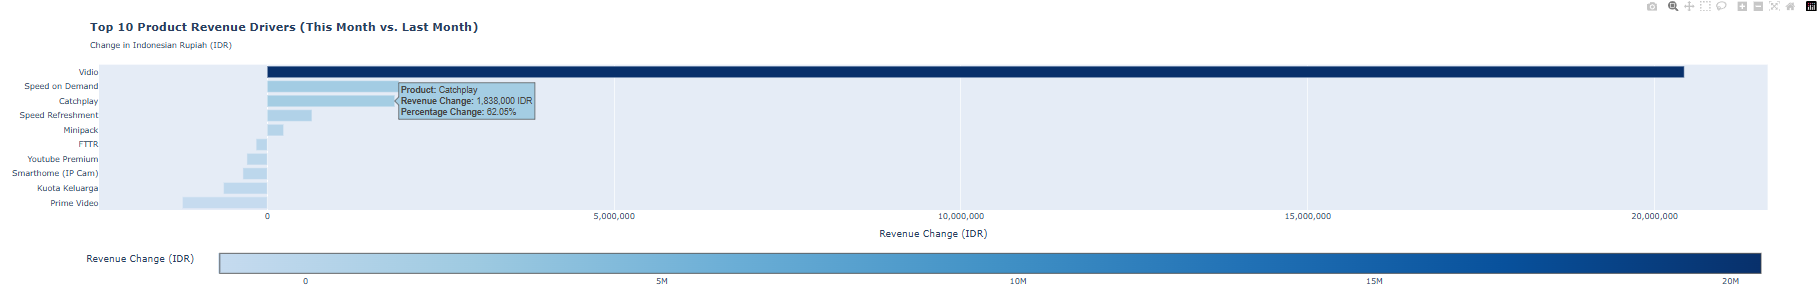
**Bottom line:** Revenue increased by IDR 22.27M (+74.3%) this month compared to last month, rising from IDR 29.97M to IDR 52.24M.

**Drivers:**
*   **Vidio:** +IDR 20.43M (+223.4%), contributing over 90% of the total growth.
*   **Speed on Demand:** +IDR 1.90M (+43.8%), the second-largest growth driver.
*   **Prime Video:** -IDR 1.22M (-31.1%), the largest negative driver, partially offsetting gains.

**Next Actions:**
1.  **Investigate Vidio's success:** Deep dive into the campaigns, content, or pricing changes that drove the +IDR 20.4M surge to replicate this success.
2.  **Diagnose Prime Video's decline:** Analyze customer churn and acquisition data for Prime Video to understand and reverse the -IDR 1.2M drop.
3.  **Analyze other growers:** Review the performance of "Speed on Demand" and "Catchplay" to see if successful tactics can be applied to other products.

**Caveats:** Analysis is based on aggregated product revenue; it does not decompose changes into price vs. volume drivers.
**Confidence:** High
<br><br>

Total response time = 264.18 = 4m 24.18s<br>